In [2]:
# import necessary libraries for our work

# basic libraries
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning libraries and modules
from sklearn.model_selection import train_test_split

# deep learning libraries and modules
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense, Dropout, Embedding, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences

# NLP libraries and modules
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import gensim
from gensim.models import Word2Vec

# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
# read the train data
train_data = pd.read_csv("https://drive.google.com/u/0/uc?id=1-AlW7oNJHaqi3xk_9dWHUS52Dzl_FmFW&export=download&confirm=t&uuid=1fea11a3-c36e-4fbf-9eac-0f3d8e08efb3&at=AB6BwCCCO86pkLyXIOWCl-MTnZZh:1698996303307", low_memory=False)
# show the train data
train_data

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime
0,2,NaN,False,2016-11-11,A2OSUEZJIN7BI,0511189877,NaN,Chris,I have an older URC-WR7 remote and thought thi...,Cannot Learn,1478822400
1,5,NaN,True,2016-06-06,A2NETQRG6JHIG7,0511189877,NaN,Qrysta White,First time I've EVER had a remote that needed ...,zero programming needed! Miracle!?,1465171200
2,4,NaN,True,2016-03-10,A12JHGROAX49G7,0511189877,NaN,Linwood,Got them and only 2 of them worked. company ca...,Works Good and programs easy.,1457568000
3,5,NaN,True,2016-01-14,A1KV65E2TMMG6F,0511189877,NaN,Dane Williams,I got tired of the remote being on the wrong s...,Same as TWC remote,1452729600
4,5,NaN,True,2016-10-20,A280POPEWI0NSA,0594459451,NaN,Kristina H.,After purchasing cheap cords from another webs...,Good Quality Cord,1476921600
...,...,...,...,...,...,...,...,...,...,...,...
838939,5,NaN,True,2017-07-25,A1OOVLE2KZ6KGA,B01HJCN1EI,NaN,Puddzee,These are my favorite charging cords for a few...,Worth the price.,1500940800
838940,1,NaN,True,2017-04-04,A77K1B31UAQ29,B01HJCN1EI,NaN,addictedtoreading,"Update....after 2 months of gentle use, cable ...",UPDATE...BREAKS AND SLOW CHARGING,1491264000
838941,3,NaN,True,2017-07-08,A2SVXUVUAWUDK2,B01HJH42KU,NaN,Andrew,These are okay. The connection becomes very if...,Hope this makes sense. You'd understand if you...,1499472000
838942,5,2.0,True,2016-12-01,A2HUZO7MQAY5I2,B01HJH40WU,NaN,michael clontz,"Ok here is an odd thing that happened to me, I...",Not the correct product as linked in the sale.,1480550400


In [4]:
# getting a random part of total train data for model fitting
train_data = train_data.sample(frac=0.3, random_state = 42)
train_data

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime
479970,4,NaN,True,2016-07-12,AX7MXA975XBAV,B010H0SL9O,NaN,David,I really like this product! The only reason I...,Good Product. I just got one for my wife's an...,1468281600
529489,5,NaN,True,2016-10-03,A24LUA312PIIG5,B014M8ZO92,"{'Color:': ' Phantom Edition', 'Style:': ' Cor...",Cobra GT,"these are better than the Boom ones, pricey th...",these are better than the Boom ones,1475452800
380130,5,NaN,True,2018-03-19,AN94QSQUJF627,B00RH29CJO,NaN,MikeM,"Just got a new-to-me 2013 Mazda MX-5, and forg...","High build quality, syncs to my S8 quickly, fi...",1521417600
568335,5,NaN,True,2016-05-21,AX5E1Q0LNLOHG,B016UBLTMK,{'Color:': ' Chevron Gray'},Fiapop,Terrific case. Stylish and very soft inside.\n...,Great Customer Service!,1463788800
355122,5,NaN,True,2017-02-27,A3M5CEQWC2ENSS,B00P31BMHG,{'Size:': ' The Anchor'},Daniel Kang,Came quick and does what it is supposed to. De...,Perfect!,1488153600
...,...,...,...,...,...,...,...,...,...,...,...
506788,2,3.0,True,2017-02-24,A2UUHH6GCN4BNR,B013ALA9LA,NaN,R,"Great when it works, but when it doesn't, you ...",Not ready for prime time. (We're another victi...,1487894400
492070,5,10,True,2018-01-27,A2GLO5YZRLK2LJ,B011IH685E,"{'Color:': ' Black', 'Style:': ' SoundTouch 10'}",Kae,"This speaker is crisp, clear and has great bas...",Bose is ALWAYS a great choice!,1517011200
64001,5,NaN,True,2016-08-09,AZXDJZVI54TTK,B002HH0W5W,"{'Capacity:': ' 5-Port Desktop', 'Model:': ' P...",ToddM,"Review for the TEG-S5g (5-Port, Plastic Housin...",Excellent switch (TEG-S5g),1470700800
594559,5,NaN,True,2016-08-19,AAFRC2OOHO5WJ,B018K5EJCQ,NaN,Amazon Customer,It's up to you whether or not it's worth the e...,Update: It's worth it!,1471564800


In [5]:
# (ref: https://github.com/mzhoolideh/KNTU_ML_2023)

# change the data type of the overall column from int64 to int8
train_data["overall"] = train_data["overall"].astype(np.int8)
# change the data type of the unixReviewTime column from int64 to int32
train_data["unixReviewTime"] = train_data["unixReviewTime"].astype(np.int32)

In [6]:
# (ref: https://saturncloud.io/blog/converting-object-column-in-pandas-dataframe-to-datetime-a-data-scientists-guide/)
train_data["reviewTime"] = pd.to_datetime(train_data["reviewTime"])
# (ref: https://stackoverflow.com/questions/28986489/how-to-replace-text-in-a-string-column-of-a-pandas-dataframe)
train_data["vote"] = train_data["vote"].str.replace(",", "").astype(np.float64)
# (ref: https://github.com/mzhoolideh/KNTU_ML_2023)
train_data["vote"] = train_data["vote"].astype(np.float16)

In [7]:
train_data = train_data[['overall', 'reviewText']]
train_data

,overall,reviewText
479970,4,I really like this product! The only reason I...
529489,5,"these are better than the Boom ones, pricey th..."
380130,5,"Just got a new-to-me 2013 Mazda MX-5, and forg..."
568335,5,Terrific case. Stylish and very soft inside.\n...
355122,5,Came quick and does what it is supposed to. De...
...,...,...
506788,2,"Great when it works, but when it doesn't, you ..."
492070,5,"This speaker is crisp, clear and has great bas..."
64001,5,"Review for the TEG-S5g (5-Port, Plastic Housin..."
594559,5,It's up to you whether or not it's worth the e...


In [8]:
# count of unique values in Sentiment column
train_data['overall'].value_counts()

5    138276
4     47071
1     24947
3     24267
2     17122
Name: overall, dtype: int64

In [9]:
# downloading stopwords from nltk library
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Review text Cleaning
def clean_reviews(text):

	# removing html brackets and other square brackets from the string using regex
	regex = re.compile('<.*?>') # r'<.*?>'
	text = re.sub(regex, '', text)

	# removing special characters like @, #, $, etc
	pattern = re.compile('[^a-zA-z0-9\s]')
	text = re.sub(pattern,'',text)

	# removing numbers
	pattern = re.compile('\d+')
	text = re.sub(pattern,'',text)

	# converting text to lower case
	text = text.lower()

	# Tokenization of words
	text = word_tokenize(text)

	# Stop words removal
	text = [word for word in text if not word in stop_words]

	return text

# using the clean_reviews function on the dataset
train_data['reviewText'] = train_data['reviewText'].apply(clean_reviews)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [10]:
train_data

,overall,reviewText
479970,4,"[really, like, product, reason, took, one, sta..."
529489,5,"[better, boom, ones, pricey, thoughue, boom, p..."
380130,5,"[got, newtome, mazda, mx, forgot, era, bluetoo..."
568335,5,"[terrific, case, stylish, soft, inside, want, ..."
355122,5,"[came, quick, supposed, definitely, better, ta..."
...,...,...
506788,2,"[great, works, doesnt, stuck, control, wifi, d..."
492070,5,"[speaker, crisp, clear, great, bass, love, sys..."
64001,5,"[review, tegsg, port, plastic, housing, plug, ..."
594559,5,"[whether, worth, extra, money, nonbacklit, one..."


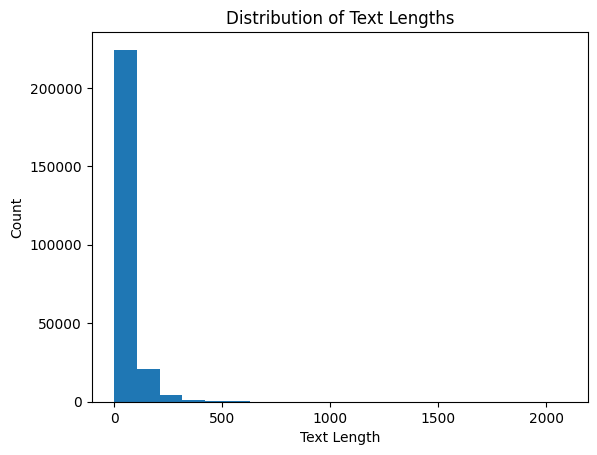

Chosen Cutoff Point: 157.0


In [11]:
# Compute the lengths of the texts
text_lengths = train_data['reviewText'].astype(str).apply(lambda x: len(str(x).split()))
# Plot a histogram of the text lengths
plt.hist(text_lengths, bins=20)
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.title('Distribution of Text Lengths')
plt.show()

# Determine the cutoff point
cutoff_percentile = 95  # Choose 95th percentile
cutoff_point = np.percentile(text_lengths, cutoff_percentile)

print("Chosen Cutoff Point:", cutoff_point)



In [12]:
tokenizer = Tokenizer()

# converting all the reviews to list to pass it as a parameter to fit_on_texts
reviews_to_list = train_data['reviewText'].tolist()
tokenizer.fit_on_texts(reviews_to_list)

# Generating text sequences
text_sequences = np.array(tokenizer.texts_to_sequences(reviews_to_list))

# one hot encoding
train_data = pd.get_dummies(train_data, columns = ['overall'])

# setting maximum words we want in an example
max_words = int(cutoff_point)


In [13]:
train_data

,reviewText,overall_1,overall_2,overall_3,overall_4,overall_5
479970,"[really, like, product, reason, took, one, sta...",0,0,0,1,0
529489,"[better, boom, ones, pricey, thoughue, boom, p...",0,0,0,0,1
380130,"[got, newtome, mazda, mx, forgot, era, bluetoo...",0,0,0,0,1
568335,"[terrific, case, stylish, soft, inside, want, ...",0,0,0,0,1
355122,"[came, quick, supposed, definitely, better, ta...",0,0,0,0,1
...,...,...,...,...,...,...
506788,"[great, works, doesnt, stuck, control, wifi, d...",0,1,0,0,0
492070,"[speaker, crisp, clear, great, bass, love, sys...",0,0,0,0,1
64001,"[review, tegsg, port, plastic, housing, plug, ...",0,0,0,0,1
594559,"[whether, worth, extra, money, nonbacklit, one...",0,0,0,0,1


In [14]:
# Generatin our X (input) to the model
# using pad_sequences and y (output)
X = pad_sequences(text_sequences, maxlen = max_words)
y = train_data[['overall_1', 'overall_2', 'overall_3', 'overall_4',
		'overall_5']]
# y = train_data["overall"]
print(X.shape, y.shape)

(251683, 157) (251683, 5)


In [15]:
# Train Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(201346, 157) (50337, 157) (201346, 5) (50337, 5)


In [17]:
model = Sequential(name="LSTM_Model")
model.add(Embedding(len(tokenizer.word_index)+1,
					max_words,
					input_length=max_words))

# adding a LSTM layer
model.add(LSTM(150, return_sequences=False))
BatchNormalization()
model.add(Dropout(0.5))

#adding a dense layer with activation function of relu
model.add(Dense(50, activation='relu'))
BatchNormalization()
model.add(Dropout(0.5))

# adding the final output activation with activation function of softmax
model.add(Dense(5, activation='softmax'))

# printing model summary
print(model.summary())


Model: "LSTM_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 157, 157)          25106498  
                                                                 
 lstm (LSTM)                 (None, 150)               184800    
                                                                 
 dropout (Dropout)           (None, 150)               0         
                                                                 
 dense (Dense)               (None, 50)                7550      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 5)                 255       
                                                                 
Total params: 25299103 (96.51 MB)
Trainable params: 2529

In [18]:
# Compiling the model
model.compile(
	loss="categorical_crossentropy",
	optimizer='adam',
	metrics=['accuracy']
)

# Training the GRU model
history = model.fit(X_train, y_train,
						batch_size=64,
						epochs=3,
						verbose=1,
						validation_data=(X_test, y_test))

# Printing model score on test data
print("LSTM model Score---> ", model.evaluate(X_test, y_test, verbose=1))


Epoch 1/3
3147/3147 [==============================] - 3166s 1s/step - loss: 0.9615 - accuracy: 0.6279 - val_loss: 0.8681 - val_accuracy: 0.6563
Epoch 2/3
3147/3147 [==============================] - 3219s 1s/step - loss: 0.8162 - accuracy: 0.6778 - val_loss: 0.8553 - val_accuracy: 0.6627
Epoch 3/3
1574/1574 [==============================] - 159s 101ms/step - loss: 0.8886 - accuracy: 0.6591
LSTM model Score--->  [0.8886219263076782, 0.6590976715087891]


In [25]:
model.save('trained_lstm_model.h5')

Text(0, 0.5, 'Accuracy')

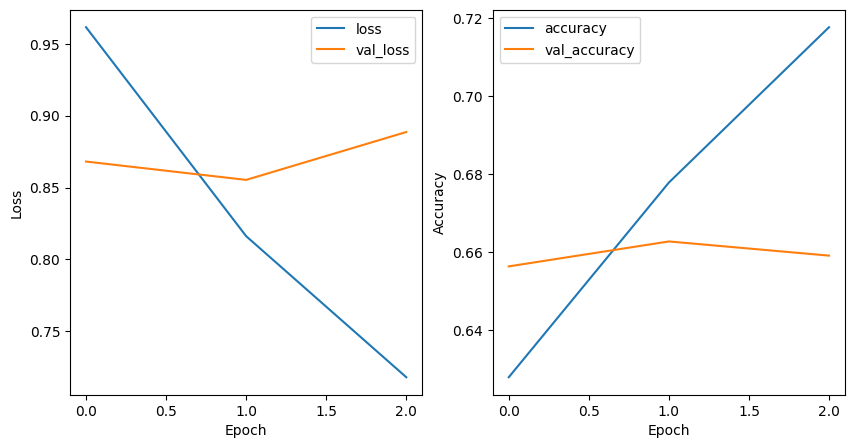

In [19]:
# Plotting the history
metrics = history.history
plt.figure(figsize=(10, 5))

# Plotting training and validation loss
plt.subplot(1, 2, 1)
plt.plot(history.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.epoch, metrics['accuracy'],
		metrics['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')


In [20]:
predicted_labels = model.predict(X_test)
predicted = np.argmax(predicted_labels, axis = 1) + 1

true_labels = np.argmax(np.array(y_test), axis = 1) + 1


1574/1574 [==============================] - 162s 102ms/step


In [21]:
from sklearn.metrics import f1_score

# Calculate the F1 score with micro-averaging
f1score_micro = f1_score(true_labels, predicted, average='micro')

print("Micro-averaged F1 Score:", f1score_micro)

Micro-averaged F1 Score: 0.6590976816258418


In [22]:
# read the test data
test_data = pd.read_csv("https://drive.google.com/u/0/uc?id=1-8TsrqTRFP-q9TM-6HinhO0ZVXFHq9TB&export=download")

# downloading stopwords from nltk library
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Review text Cleaning
def clean_reviews(text):

	# removing html brackets and other square brackets from the string using regex
	regex = re.compile('<.*?>') # r'<.*?>'
	text = re.sub(regex, '', text)

	# removing special characters like @, #, $, etc
	pattern = re.compile('[^a-zA-z0-9\s]')
	text = re.sub(pattern,'',text)

	# removing numbers
	pattern = re.compile('\d+')
	text = re.sub(pattern,'',text)

	# converting text to lower case
	text = text.lower()

	# Tokenization of words
	text = word_tokenize(text)

	# Stop words removal
	text = [word for word in text if not word in stop_words]

	return text

# using the clean_reviews function on the dataset
test_data['reviewText'] = test_data['reviewText'].apply(clean_reviews)

tokenizer = Tokenizer()

# converting all the reviews to list to pass it as a parameter to fit_on_texts
reviews_to_list = test_data['reviewText'].tolist()
tokenizer.fit_on_texts(reviews_to_list)

# Generating text sequences
text_sequences = np.array(tokenizer.texts_to_sequences(reviews_to_list))

# setting maximum words we want in an example
max_words = int(cutoff_point)

# Generatin our X (input) to the model
# using pad_sequences and y (output)
X = pad_sequences(text_sequences, maxlen = max_words)


print(X.shape, y.shape)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(20000, 157) (251683, 5)


In [23]:
predicted_labels = model.predict(X)
predicted = np.argmax(predicted_labels, axis = 1) + 1

625/625 [==============================] - 63s 101ms/step


In [24]:
predicted_df = pd.DataFrame(predicted)
predicted_df.columns=["predicted"]
predicted_df.to_csv('q2_submission.csv', index=False)